In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from scipy import stats

In [2]:
data = pd.read_csv("C://Users//hp//Desktop//Research Work//Churn Model//WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data.describe().style.background_gradient(cmap="summer")

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
for column_name in data.columns:
    unique_values = len(data[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,
                                                                                         unique_values=unique_values))

Feature 'customerID' has '7043' unique values
Feature 'gender' has '2' unique values
Feature 'SeniorCitizen' has '2' unique values
Feature 'Partner' has '2' unique values
Feature 'Dependents' has '2' unique values
Feature 'tenure' has '73' unique values
Feature 'PhoneService' has '2' unique values
Feature 'MultipleLines' has '3' unique values
Feature 'InternetService' has '3' unique values
Feature 'OnlineSecurity' has '3' unique values
Feature 'OnlineBackup' has '3' unique values
Feature 'DeviceProtection' has '3' unique values
Feature 'TechSupport' has '3' unique values
Feature 'StreamingTV' has '3' unique values
Feature 'StreamingMovies' has '3' unique values
Feature 'Contract' has '3' unique values
Feature 'PaperlessBilling' has '2' unique values
Feature 'PaymentMethod' has '4' unique values
Feature 'MonthlyCharges' has '1585' unique values
Feature 'TotalCharges' has '6531' unique values
Feature 'Churn' has '2' unique values


In [6]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
data_new = data.drop("customerID", axis=1)
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [8]:
data_new.TotalCharges = pd.to_numeric(data_new.TotalCharges, errors='coerce')
data_new.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
data_new.dropna(inplace=True)
data_new['Churn'].replace(to_replace='Yes', value=1, inplace = True)
data_new['Churn'].replace(to_replace='No', value = 0, inplace = True)

data_dummies = pd.get_dummies(data_new)
data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   MonthlyCharges                           7032 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   Churn                                    7032 non-null   int64  
 5   gender_Female                            7032 non-null   bool   
 6   gender_Male                              7032 non-null   bool   
 7   Partner_No                               7032 non-null   bool   
 8   Partner_Yes                              7032 non-null   bool   
 9   Dependents_No                            7032 non-null   bool   
 10  Dependents_Yes                           7032 non-nul

SeniorCitizen                              0.150541
tenure                                    -0.354049
MonthlyCharges                             0.192858
TotalCharges                              -0.199484
Churn                                      1.000000
gender_Female                              0.008545
gender_Male                               -0.008545
Partner_No                                 0.149982
Partner_Yes                               -0.149982
Dependents_No                              0.163128
Dependents_Yes                            -0.163128
PhoneService_No                           -0.011691
PhoneService_Yes                           0.011691
MultipleLines_No                          -0.032654
MultipleLines_No phone service            -0.011691
MultipleLines_Yes                          0.040033
InternetService_DSL                       -0.124141
InternetService_Fiber optic                0.307463
InternetService_No                        -0.227578
OnlineSecuri

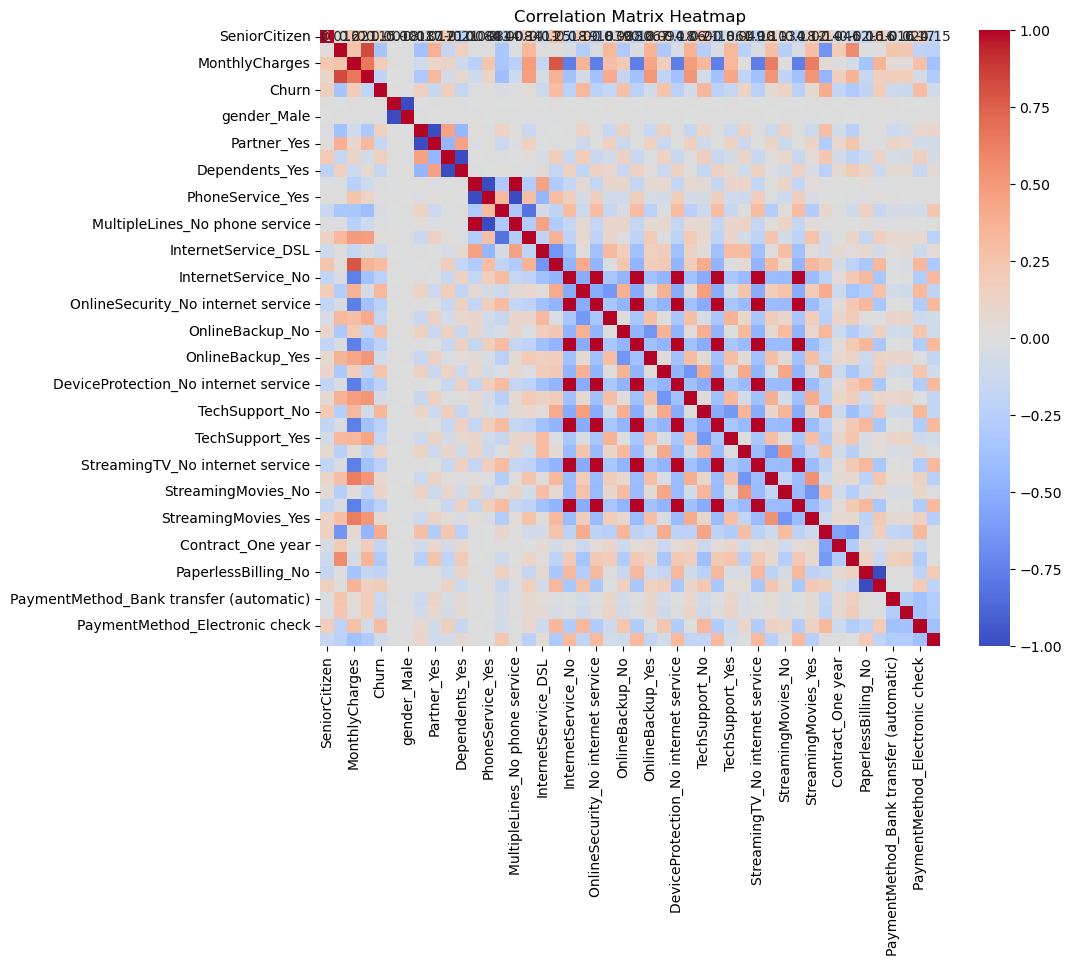

In [11]:
correlation_matrix = data_dummies.corr()
column_of_interest = 'Churn'
correlation_with_column = correlation_matrix[column_of_interest]
print(correlation_with_column)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

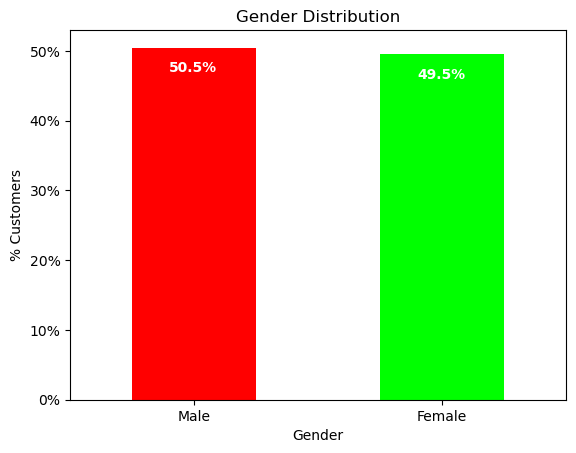

In [16]:
import matplotlib.ticker as mtick
colors = ['#Ff0000','#00ff00']

ax = (data_new['gender'].value_counts()*100.0 /len(data_new)).plot(kind='bar',stacked = True, rot = 0, color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

totals=[]

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-3.5, str(round((i.get_height()/total),1))+'%', color = 'white', weight = 'bold')

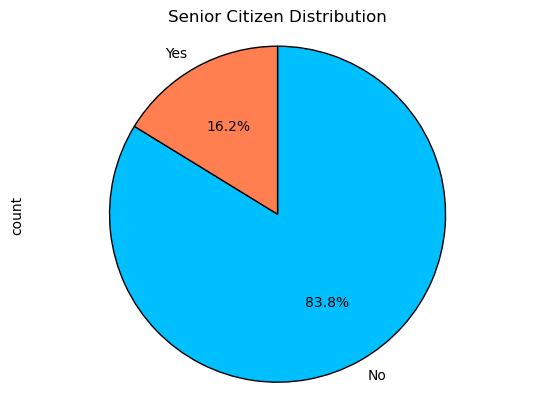

In [28]:
colors = ['#00BFFF', '#FF7F50']

senior_citizen_percent = data_new['SeniorCitizen'].value_counts() * 100.0 / len(data_new)

ax = senior_citizen_percent.plot.pie(autopct='%.1f%%', labels=['No', 'Yes'], colors=colors, startangle=90, counterclock=False, wedgeprops={'edgecolor': 'black'})

plt.title('Senior Citizen Distribution')

plt.axis('equal')

plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_18196\3734291572.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_new['tenure'], hist = True, kde = False, bins = int(180/5), color = colors, hist_kws = {'edgecolor':'black'}, kde_kws = {'linewidth' :4})


Text(0.5, 1.0, 'Customers by Tenure')

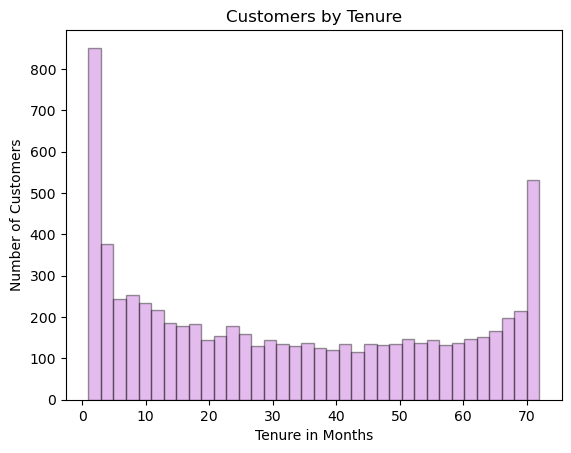

In [30]:
colors = ['#BA55D3']
ax = sns.distplot(data_new['tenure'], hist = True, kde = False, bins = int(180/5), color = colors, hist_kws = {'edgecolor':'black'}, kde_kws = {'linewidth' :4})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure in Months')
ax.set_title('Customers by Tenure')

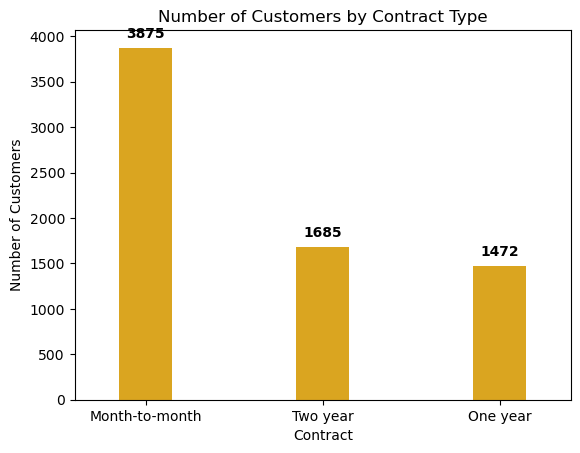

In [34]:
colors = ['#DAA520']
ax = data_new['Contract'].value_counts().plot(kind = 'bar', rot = 0, width = 0.3, color = colors)
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Customers by Contract Type')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+p.get_width()/2.,p.get_height()), ha = 'center', va = 'center', xytext=(0,10), textcoords = 'offset points', color = 'black', weight = 'bold')
plt.show()

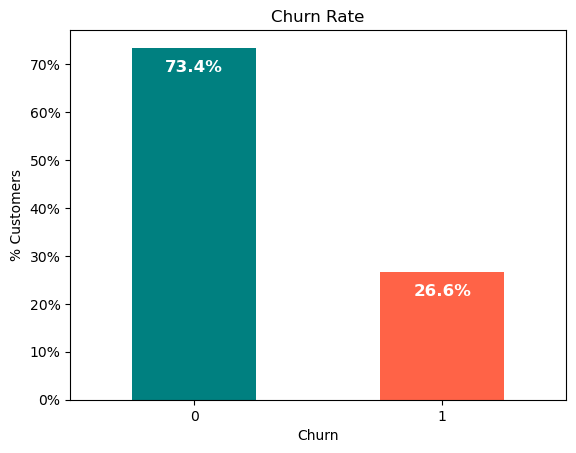

In [41]:
colors = ['#008080', '#FF6347']
ax = (data_new['Churn'].value_counts() * 100.0 / len(data_new)).plot(kind='bar', rot=0, color=colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.set_ylabel('% Customers')
ax.set_xlabel('Churn')
ax.set_title('Churn Rate')

for p in ax.patches:
    percentage = f'{p.get_height():.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height() - 4),
                ha='center', va='center', fontsize=12, color='white', weight='bold')
